In [1]:
# Default Import
import os
import pandas
import matplotlib. pyplot as plt
#import seaborn

# User Generated Imports
import webscraper
import dataImporter
import covidPlotter

Download the datafiles from: https://github.com/CSSEGISandData/COVID-19/

In [2]:
url = "https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series"
ext = 'csv'

# Location where data will be stored locally
datapath = os.getcwd() + "/data/csse_covid_19_time_series"

# Webscrape
webscraper.webscrape(datapath,url,ext)
population = webscraper.webscrape_population_2020()

Fetching Data From: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series
Data is Stored in: /Users/awells/UVA/CS/apr_22_2020/cs-project-covid/data/csse_covid_19_time_series/
Fetching Data From: https://www.worldometers.info/world-population/population-by-country/


The Data files we'll be looking at:

In [3]:
!ls {datapath}

Errata.csv
time_series_covid19_confirmed_US.csv
time_series_covid19_confirmed_global.csv
time_series_covid19_deaths_US.csv
time_series_covid19_deaths_global.csv
time_series_covid19_recovered_global.csv


In [4]:
covid_19_time_series_confirmed  = pandas.read_csv(datapath + '/time_series_covid19_confirmed_global.csv')
covid_19_time_series_deaths     = pandas.read_csv(datapath + '/time_series_covid19_deaths_global.csv')
covid_19_time_series_recovered  = pandas.read_csv(datapath + '/time_series_covid19_recovered_global.csv')

Confirmed Cases by Country

In [5]:
covid_19_time_series_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,607,665,714,784,840,906,933,996,1026,1092
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,446,467,475,494,518,539,548,562,584,609
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,638,646,659,673,673,696,704,713,717,717
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,19,19,19,19,24,24,24,24


Deaths By Country

In [6]:
covid_19_time_series_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,18,21,23,25,30,30,30,33,36,36
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,23,23,24,25,26,26,26,26,26,26
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,293,313,326,336,348,364,367,375,384,392
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,29,29,31,33,33,35,35,36,37,37
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


Recovered Cases by Country

In [7]:
covid_19_time_series_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,32,32,40,43,54,99,112,131,135,150
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,217,232,248,251,277,283,302,314,327,345
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,591,601,691,708,783,846,894,1047,1099,1152
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,128,128,128,169,169,191,205,235,248,282
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,4,5,5,5,5,6,6,6,6


First We'll look at some basic Info about the confirmed cases. First lets look at a list of all the affected countries

In [8]:
unique_countries = sorted(covid_19_time_series_confirmed['Country/Region'].unique())
print(unique_countries)

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran'

We can subset a country

In [9]:
us_confirmed = dataImporter.subset_country(covid_19_time_series_confirmed,'US')

In [10]:
us_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
225,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,...,555313,580619,607670,636350,667592,699706,732197,759086,784326,823786


In [11]:
# Since the 1st 4 columns (Province/State,Country/Region,Lat,Long) dont reference the date, we can start
# with the 5th column
dates = us_confirmed.columns[4:]
cases_per_day = us_confirmed.values[0][4:]
new_cases_per_day = [cases_per_day[i] - cases_per_day[i-1] for i in range(1,len(cases_per_day))]
new_cases_per_day.insert(0,cases_per_day[0]) #Add how many it was on day 1

In [12]:
print(dates)
print(cases_per_day)

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20',
       '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20',
       '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20',
       '4/13/20', '4/14/20', '4/15

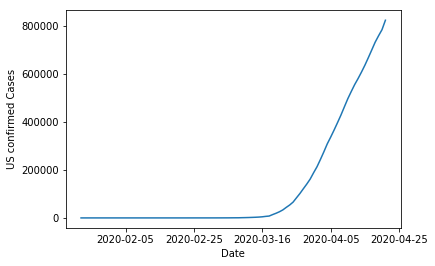

In [13]:
covidPlotter.plot_country_cases(us_confirmed,'US','confirmed')

Now lets look at the Number of Cases in Days Since Initial Outbreak

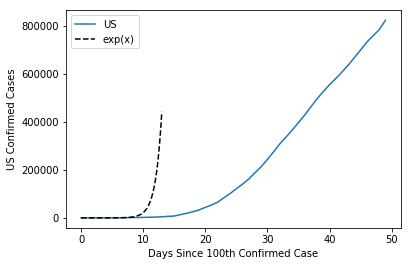

In [14]:
import covidPlotter
covidPlotter.plot_country_confirmed_cases_index(us_confirmed,'US', expGraph = True)

In [15]:
! echo "From the above plot we can see that in the U.S. in {len(dates)} days we have {cases_per_day[-1]} confirmed cases. This is an average of {float(cases_per_day[-1])/float(len(dates))} new cases per day"

From the above plot we can see that in the U.S. in 91 days we have 823786 confirmed cases. This is an average of 9052.593406593407 new cases per day


If that's the case, What is the increase per day look like?

Let's look at a boxplot of this information for the last 2 weeks (14 days)

[31533, 34126, 33755, 29861, 28917, 25306, 27051, 28680, 31242, 32114, 32491, 26889, 25240, 39460]


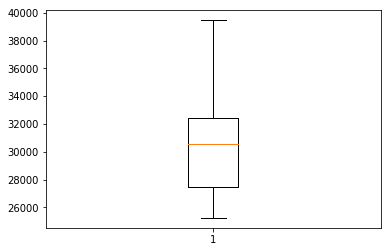

In [16]:
print(new_cases_per_day[-14:])
plt.figure()
plt.boxplot(new_cases_per_day[-14:])
plt.show()

Let's compare the U.S. to some other countries

In [17]:
china_confirmed = dataImporter.subset_country(covid_19_time_series_confirmed,'China')
spain_confirmed = dataImporter.subset_country(covid_19_time_series_confirmed,'Spain')
germany_confirmed = dataImporter.subset_country(covid_19_time_series_confirmed,'Germany')
italy_confirmed = dataImporter.subset_country(covid_19_time_series_confirmed,'Italy')

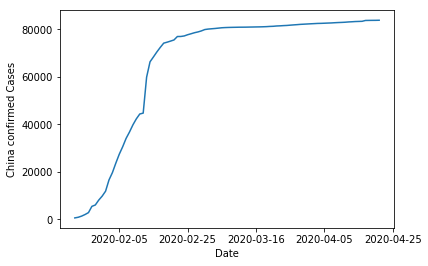

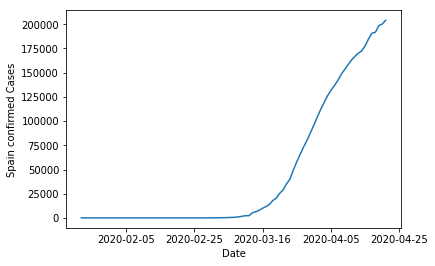

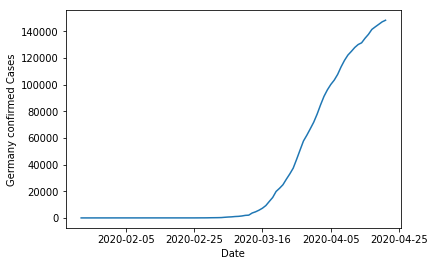

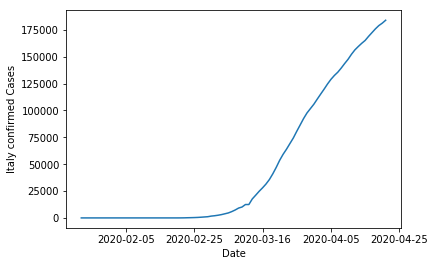

In [18]:
covidPlotter.plot_country_cases(china_confirmed,'China','confirmed')
covidPlotter.plot_country_cases(spain_confirmed,'Spain','confirmed')
covidPlotter.plot_country_cases(germany_confirmed,'Germany','confirmed')
covidPlotter.plot_country_cases(italy_confirmed,'Italy','confirmed')

In [19]:
us_days, us_cases_per_day, us_new_cases_per_day = dataImporter.get_cases_confirmed_as_lists(us_confirmed)
china_days, china_cases_per_day, china_new_cases_per_day = dataImporter.get_cases_confirmed_as_lists(china_confirmed)
germany_days, germany_cases_per_day, germany_new_cases_per_day = dataImporter.get_cases_confirmed_as_lists(germany_confirmed)
spain_days, spain_cases_per_day, spain_new_cases_per_day = dataImporter.get_cases_confirmed_as_lists(spain_confirmed)
italy_days, italy_cases_per_day, italy_new_cases_per_day = dataImporter.get_cases_confirmed_as_lists(italy_confirmed)


Number of Total Cases: 823786


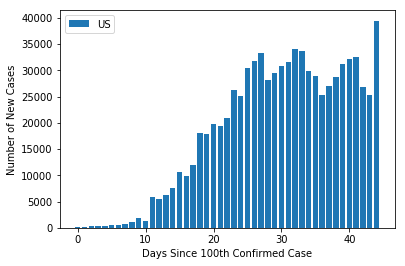

In [20]:
covidPlotter.plot_bar(us_new_cases_per_day,'US','Number of New Cases')
print("Number of Total Cases: {}".format(sum(us_new_cases_per_day)))

Number of Total Cases: 83853


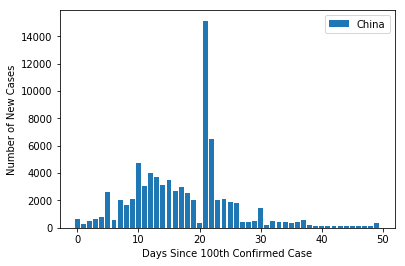

In [21]:
covidPlotter.plot_bar(china_new_cases_per_day,'China','Number of New Cases')
print("Number of Total Cases: {}".format(sum(china_new_cases_per_day)))

Number of Total Cases: 148291


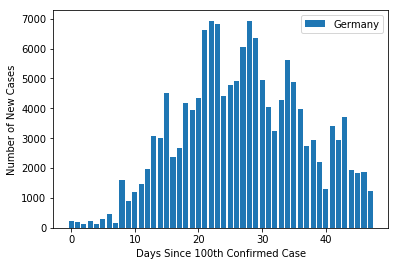

In [22]:
covidPlotter.plot_bar(germany_new_cases_per_day,'Germany','Number of New Cases')
print("Number of Total Cases: {}".format(sum(germany_new_cases_per_day)))

Number of Total Cases: 204178


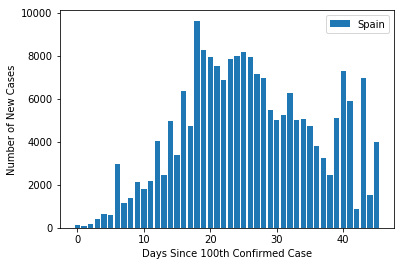

In [23]:
covidPlotter.plot_bar(spain_new_cases_per_day,'Spain','Number of New Cases')
print("Number of Total Cases: {}".format(sum(spain_new_cases_per_day)))

Number of Total Cases: 183957


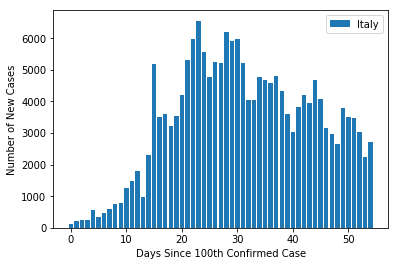

In [24]:
covidPlotter.plot_bar(italy_new_cases_per_day,'Italy','Number of New Cases')
print("Number of Total Cases: {}".format(sum(italy_new_cases_per_day)))

Let's Compare over the last 21 Days


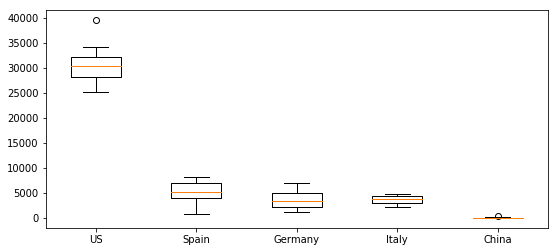

In [25]:
nDays = 21
print("Let's Compare over the last {} Days".format(nDays))
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))
all_data=[us_new_cases_per_day[-nDays:],
             spain_new_cases_per_day[-nDays:],
             germany_new_cases_per_day[-nDays:],
             italy_new_cases_per_day[-nDays:],
             china_new_cases_per_day[-nDays:]
            ]
axs.boxplot(all_data)
plt.setp(axs, xticks=[y + 1 for y in range(len(all_data))], xticklabels=['US', 'Spain', 'Germany', 'Italy','China'])
plt.show()

Let's Compare over the last 14 Days


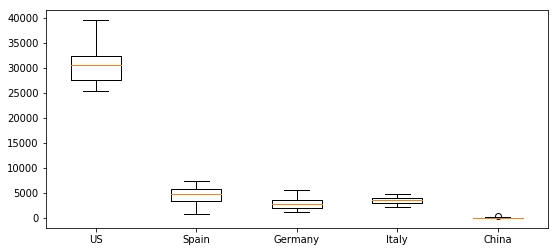

In [26]:
nDays = 14
print("Let's Compare over the last {} Days".format(nDays))
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))
all_data=[us_new_cases_per_day[-nDays:],
             spain_new_cases_per_day[-nDays:],
             germany_new_cases_per_day[-nDays:],
             italy_new_cases_per_day[-nDays:],
             china_new_cases_per_day[-nDays:]
            ]
axs.boxplot(all_data)
plt.setp(axs, xticks=[y + 1 for y in range(len(all_data))], xticklabels=['US', 'Spain', 'Germany', 'Italy','China'])
plt.show()

The next step of this analysis is to see if people are getting better

In [27]:
us_recovered = dataImporter.subset_country(covid_19_time_series_recovered,'US')

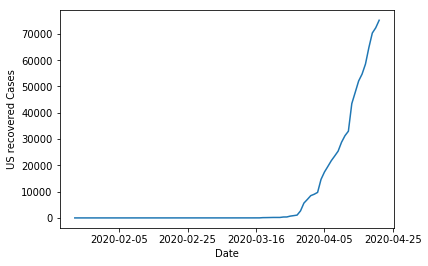

In [28]:
covidPlotter.plot_country_cases(us_recovered,'US','recovered')

Again, We'll compare to other countries

In [29]:
china_recovered = dataImporter.subset_country(covid_19_time_series_recovered,'China')
spain_recovered = dataImporter.subset_country(covid_19_time_series_recovered,'Spain')
germany_recovered = dataImporter.subset_country(covid_19_time_series_recovered,'Germany')
italy_recovered = dataImporter.subset_country(covid_19_time_series_recovered,'Italy')

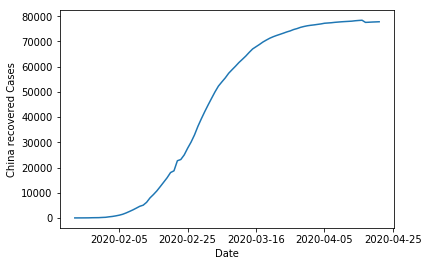

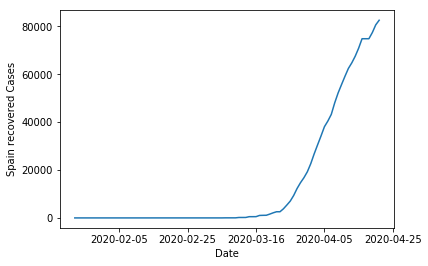

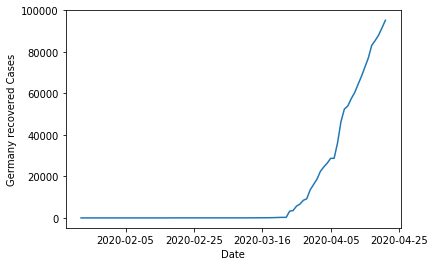

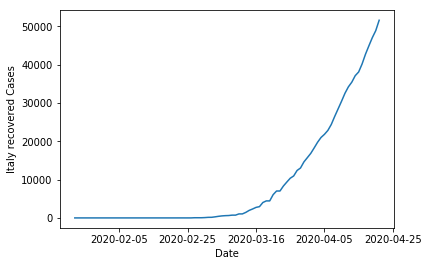

In [30]:
covidPlotter.plot_country_cases(china_recovered,'China','recovered')
covidPlotter.plot_country_cases(spain_recovered,'Spain','recovered')
covidPlotter.plot_country_cases(germany_recovered,'Germany','recovered')
covidPlotter.plot_country_cases(italy_recovered,'Italy','recovered')

Now Lets compare Confirmed vs recovered

In [31]:
us_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
225,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,...,555313,580619,607670,636350,667592,699706,732197,759086,784326,823786


In [32]:
us_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
225,NaN,US,37.0902,-95.7129,0,0,0,0,0,0,...,32988,43482,47763,52096,54703,58545,64840,70337,72329,75204


In [33]:
us_diff = us_confirmed.values[0][4:] - us_recovered.values[0][4:]# Confirmed - Recovered

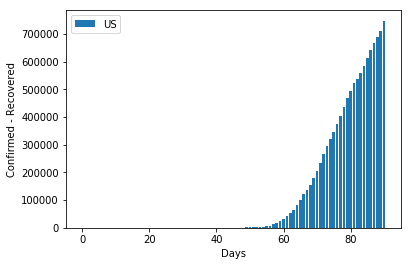

In [34]:
covidPlotter.plot_bar_active(us_diff,'US','Confirmed - Recovered') 

Now we'll do the same for China

In [35]:
china_confirmed = china_confirmed.groupby(['Country/Region']).sum().reset_index()
china_confirmed.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
0,China,1083.3367,3684.4197,548,643,920,1406,2075,2877,5509,...,83134,83213,83306,83356,83403,83760,83787,83805,83817,83853


In [36]:
china_recovered = china_recovered.groupby(['Country/Region']).sum().reset_index()
china_recovered.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
0,China,1083.3367,3684.4197,28,30,36,39,49,58,101,...,77956,78039,78200,78311,78401,77552,77614,77690,77745,77799


In [37]:
china_diff = china_confirmed.values[0][4:] - china_recovered.values[0][4:]# Confirmed - Recovered
print(china_diff)

[613 884 1367 2026 2819 5408 5967 8006 9588 11616 16167 19102 22864 26325
 29110 32111 34218 36610 38436 39750 39677 53678 58381 59115 59758 59972
 60005 58657 57063 56846 54302 53835 52226 50078 48082 45670 42599 40036
 37770 35282 32811 30385 28245 26746 25231 23435 22056 20706 19277 18031
 16749 15317 13986 13123 12260 11347 10621 9984 9448 9073 8684 8311 7888
 7601 7177 6899 6540 6275 6073 5956 5867 5751 5597 5395 5355 5308 5242
 5204 5150 5137 5178 5174 5106 5045 5002 6208 6173 6115 6072 6054]


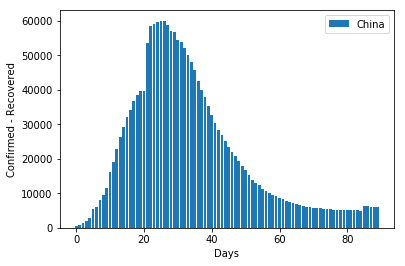

In [38]:
covidPlotter.plot_bar_active(china_diff,'China','Confirmed - Recovered') 

# POPULATION 

First We need to make sure both dataframes keys are matching

In [39]:
population.country[population.country == 'United States']  = 'US'
population.country[population.country == 'Taiwan']  = 'Taiwan*'
population.country[population.country == 'South Korea']  = 'Korea, South'
population.country[population.country == "Côte d'Ivoire"]  = "Cote d'Ivoire"
population.country[population.country == "Czech Republic (Czechia)"]  = "Czechia"
population.country[population.country == 'St. Vincent & Grenadines']  = 'Saint Vincent and the Grenadines'
population.country[population.country == 'Saint Kitts & Nevis']  = 'Saint Kitts and Nevis'
population.country[population.country == 'Sao Tome & Principe']  = 'Sao Tome and Principe'

countries = population['country'].tolist()
# Matching both Sets by Hand
#
#for country in sorted(countries):
#    if country not in unique_countries:
#        print(country)
#
#for country in sorted(unique_countries):
#    if country not in countries:
#        print(country)


## Plot of Population vs Confirmed Cases

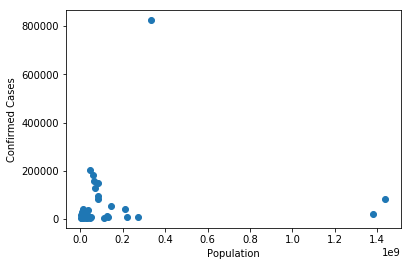

In [40]:
import numpy
fig, ax = plt.subplots(1, 1)
x = []
y = []
labels = []
import sys
covid_19_time_series_confirmed = covid_19_time_series_confirmed.groupby(['Country/Region']).sum().reset_index()
for index, row in covid_19_time_series_confirmed.iterrows():
    for index, row_pop in population.iterrows():
        if row_pop['country'] == row['Country/Region']:
            if row[-1] < 5000: # If number of Confirmed Cases < 5000
                continue
            #print("Country: {}, Cases: {}, Population: {}".format(
            #      row['Country/Region'], row[-1], row_pop['population'] ))
            x.append(int(row_pop['population']))
            y.append(int(row[-1]))
            labels.append(row['Country/Region'])
            break
plt.scatter(x,y)
plt.xlabel("Population")
plt.ylabel("Confirmed Cases")
plt.show()

## Plot of Population vs Confirmed Deaths

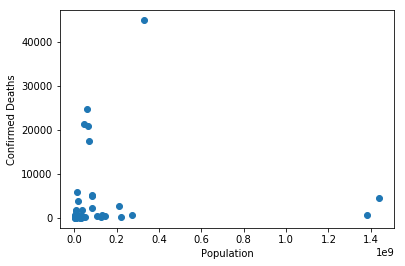

In [41]:
import numpy
fig, ax = plt.subplots(1, 1)
x = []
y = []
import sys
covid_19_time_series_deaths = covid_19_time_series_deaths.groupby(['Country/Region']).sum().reset_index()
for index, row in covid_19_time_series_deaths.iterrows():
    for index, row_pop in population.iterrows():
        if (row_pop['country'] == row['Country/Region']) and (row['Country/Region'] in labels):

            #print("Country: {}, Deaths: {}, Population: {}".format(
            #      row['Country/Region'], row[-1], row_pop['population'] ))
            x.append(int(row_pop['population']))
            y.append(int(row[-1]))
            labels.append(row['Country/Region'])
            break
plt.scatter(x,y)
plt.xlabel("Population")
plt.ylabel("Confirmed Deaths")
plt.show()

# POPULATION DENSITY

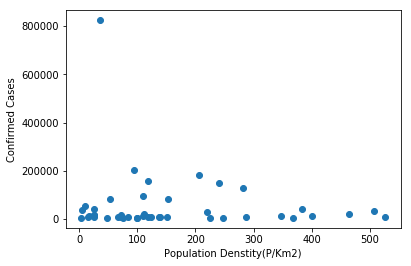

In [42]:
import numpy
fig, ax = plt.subplots(1, 1)
x = []
y = []
labels = []
import sys
covid_19_time_series_confirmed = covid_19_time_series_confirmed.groupby(['Country/Region']).sum().reset_index()
for index, row in covid_19_time_series_confirmed.iterrows():
    for index, row_pop in population.iterrows():
        if row_pop['country'] == row['Country/Region']:
            if row[-1] < 5000: # If number of Confirmed Cases < 5000
                continue
            #print("Country: {}, Cases: {}, Population Density: {}".format(
            #      row['Country/Region'], row[-1], row_pop['denstity(P/Km2)'] ))
            if int(row_pop['denstity(P/Km2)']) > 1000:
                continue
            x.append(int(row_pop['denstity(P/Km2)']))
            y.append(int(row[-1]))
            labels.append(row['Country/Region'])
            break
plt.scatter(x,y)
plt.xlabel("Population Denstity(P/Km2)")
plt.ylabel("Confirmed Cases")
plt.show()

# Checkpoint Save data as csv

In [43]:
master = []
master.append(["country", "population", "yearlyChange","netChange","denstity(P/Km2)",
             "landArea(km2)", "migrants", "fertRate","medAge", "urbanPop","worldShare", 
            "confirmed", "deaths", "recovered"])
covid_19_time_series_confirmed = covid_19_time_series_confirmed.groupby(['Country/Region']).sum().reset_index()
covid_19_time_series_deaths    =  covid_19_time_series_deaths.groupby(['Country/Region']).sum().reset_index()
covid_19_time_series_recovered =  covid_19_time_series_recovered.groupby(['Country/Region']).sum().reset_index()
for country in sorted(unique_countries):
    a = covid_19_time_series_confirmed.loc[covid_19_time_series_confirmed['Country/Region'] == country]

    b = covid_19_time_series_deaths.loc[covid_19_time_series_deaths['Country/Region'] == country]

    c = covid_19_time_series_recovered.loc[covid_19_time_series_recovered['Country/Region'] == country]

    d = population.loc[population['country'] == country]

    try:
        tmp = []
        if country == 'Korea, South':
            country = "South Korea"
        tmp = [country] + list(d.values[0][1:]) + [a.values[-1][-1],b.values[-1][-1],c.values[-1][-1]]
        master.append(tmp)
    except:
        print("Skipped: {}".format(country))
import numpy
a = numpy.asarray(master)
numpy.savetxt("project_covid.csv", a, delimiter=",",fmt='%s')


Skipped: Brunei
Skipped: Burma
Skipped: Congo (Brazzaville)
Skipped: Congo (Kinshasa)
Skipped: Diamond Princess
Skipped: Kosovo
Skipped: MS Zaandam
Skipped: West Bank and Gaza


# Start From Checkpoint

In [44]:
world = pandas.read_csv("project_covid.csv")#, error_bad_lines=False)

In [45]:
world.head()

,country,population,yearlyChange,netChange,denstity(P/Km2),landArea(km2),migrants,fertRate,medAge,urbanPop,worldShare,confirmed,deaths,recovered
0,Afghanistan,38928346,2.33 %,886592,60,652860,-62920,4.6,18,25 %,0.50 %,1092,36,150
1,Albania,2877797,-0.11 %,-3120,105,27400,-14000,1.6,36,63 %,0.04 %,609,26,345
2,Algeria,43851044,1.85 %,797990,18,2381740,-10000,3.1,29,73 %,0.56 %,2811,392,1152
3,Andorra,77265,0.16 %,123,164,470,,N.A.,N.A.,88 %,0.00 %,717,37,282
4,Angola,32866272,3.27 %,1040977,26,1246700,6413,5.6,17,67 %,0.42 %,24,2,6


In [46]:
# pandas drop columns using list of column names
world = world.drop(['yearlyChange', 'netChange', 'migrants','fertRate', 'urbanPop','worldShare'], axis=1)

In [47]:
world.head()

,country,population,denstity(P/Km2),landArea(km2),medAge,confirmed,deaths,recovered
0,Afghanistan,38928346,60,652860,18,1092,36,150
1,Albania,2877797,105,27400,36,609,26,345
2,Algeria,43851044,18,2381740,29,2811,392,1152
3,Andorra,77265,164,470,N.A.,717,37,282
4,Angola,32866272,26,1246700,17,24,2,6


In [48]:
world.describe()

,population,denstity(P/Km2),landArea(km2),confirmed,deaths,recovered
count,1.770000e+02,177.000000,1.770000e+02,177.000000,177.000000,177.000000
mean,4.281653e+07,371.988701,7.088279e+05,14455.209040,999.519774,3835.237288
std,1.543958e+08,2079.842564,1.912218e+06,68199.005332,4636.438933,14067.696809
min,8.010000e+02,2.000000,0.000000e+00,1.000000,0.000000,0.000000
25%,2.722289e+06,34.000000,2.812000e+04,68.000000,2.000000,11.000000
50%,9.904607e+06,89.000000,1.433500e+05,677.000000,11.000000,150.000000
75%,3.107294e+07,214.000000,5.667300e+05,5044.000000,136.000000,840.000000
max,1.439324e+09,26337.000000,1.637687e+07,823786.000000,44845.000000,95200.000000


In [49]:
plt.figure()
plt.tight_layout()
#seaborn.distplot(world['denstity(P/Km2)'])

<Figure size 432x288 with 0 Axes>

In [50]:
baseline = 90000 # Number of cases you want to set as a baseline
import matplotlib.dates as mdates

print("Cases Baseline: {}".format(baseline))

# Since Data is one day off, the most up-to-date values are the previous day
import datetime

df  = covid_19_time_series_confirmed.groupby(['Country/Region']).sum().reset_index()
try:
  today = datetime.date.today()
  yesterday = today - datetime.timedelta(days=1)
  yesterday = '{}{}'.format(yesterday.month,yesterday.strftime('/%d/%y'))
  df_subset = df[df[yesterday] > baseline ]

except:
  today = datetime.date.today()
  yesterday = today - datetime.timedelta(days=2)
  yesterday = '{}{}'.format(yesterday.month,yesterday.strftime('/%d/%y'))
  df_subset = df[df[yesterday] > baseline ]

print("The Last Day reference: {}".format(yesterday))

# Note Long and Lat are sums of Long and Lat

Cases Baseline: 90000
The Last Day reference: 4/21/20


In [51]:
import dataImporter
baseline = 100000
df_subset, yesterday = dataImporter.get_latest_subset(covid_19_time_series_confirmed, baseline)
print("The Last Day reference: {}".format(yesterday))
df_subset.head()

The Last Day reference: 4/21/20


,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
61,France,91.3624,59.7192,0,0,2,3,3,3,4,...,121712,125394,131361,134582,147091,149130,149149,154097,156480,159297
65,Germany,51.0000,9.0000,0,0,0,0,0,1,4,...,127854,130072,131359,134753,137698,141397,143342,145184,147065,148291
84,Italy,43.0000,12.0000,0,0,0,0,0,0,0,...,156363,159516,162488,165155,168941,172434,175925,178972,181228,183957
156,Spain,40.0000,-4.0000,0,0,0,0,0,0,0,...,166831,170099,172541,177644,184948,190839,191726,198674,200210,204178
171,US,37.0902,-95.7129,1,1,2,2,5,5,5,...,555313,580619,607670,636350,667592,699706,732197,759086,784326,823786


['France', 'Germany', 'Italy', 'Spain', 'US', 'United Kingdom']


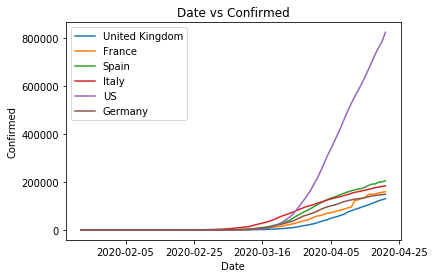

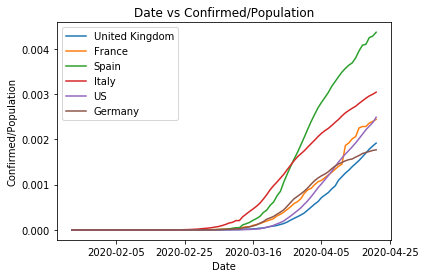

UnboundLocalError: local variable 'index' referenced before assignment

In [55]:
unique_countries = sorted(df_subset['Country/Region'].unique())
print(unique_countries)
covidPlotter.plot_multi_countries(unique_countries, population, df_subset,yaxis='confirmed')
covidPlotter.plot_multi_countries(unique_countries, population, df_subset,yaxis='population')
covidPlotter.plot_multi_countries(unique_countries, population, df_subset,yaxis='density')